<h1><center> Analyse and Predict GDP per Capita in Saudi Arabia 
    </h1>



# Project Overview


This analysis aims to answer the following key business questions:

1. How has GDP per capita in Saudi Arabia changed over time, and what long-term trends can be observed?
2. What is the relationship between economic indicators (such as inflation, exports, and CPI) and GDP per capita in Saudi Arabia?
3. How would hypothetical changes in inflation levels affect GDP per capita in 2025 under a scenario-based prediction approach?

## Dataset Description
### Source
The dataset used in this project is sourced from the World Bank Open Data platform[1], which provides reliable and publicly available economic indicators for countries worldwide.
### Size 
The dataset includes annual time-series data for Saudi Arabia covering multiple economic indicators, such as GDP per capita (constant 2015 US$), inflation rates, consumer price index (CPI), and exports of goods and services.
### Challenges
One of the main challenges in this dataset is its wide format, where each year is represented as a separate column. As shown by the dataset structure, this format limits effective trend analysis and comparison across time. Therefore, the data must be transformed into a long format to enable meaningful time-series analysis and visualization.



## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Load The World Development Indicators dataset

In [4]:
# reading the data using pd

df=pd.read_csv("WDI.csv")

 ##  Data Exploration 


In [5]:
df.shape

(9, 56)

In [6]:
df.describe()

,1970 [YR1970],1971 [YR1971],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,9358.778663,10316.432074,15010.821511,13474.530785,14709.188401,14728.810835,13931.213641,14587.343344,14558.191513,14123.516155,...,5851.358539,5733.310119,5796.166298,6138.108376,6264.030264,5744.592162,6270.547201,6718.956155,6450.219149,6282.466419
std,18668.598112,20578.246291,29942.289659,26846.026485,29316.606332,29366.173557,27785.763578,29092.067027,29024.082458,28154.749616,...,11603.300474,11366.591742,11492.744878,12170.375981,12427.863816,11388.840791,12434.864694,13325.418011,12789.860808,12454.044759
min,0.177778,4.475000,21.437008,34.576106,31.558661,11.399011,-1.583602,1.081567,4.169267,2.798982,...,1.222693,2.053471,-0.834846,2.465943,-1.192986,3.372350,3.063290,2.474074,2.327085,1.687921
25%,16.901868,18.730543,31.357613,43.631609,52.686846,45.915224,36.591632,41.412681,48.634168,47.813765,...,23.885772,22.370685,24.063192,27.257223,23.821157,18.700446,22.632569,27.607276,23.263661,22.253889
50%,36.639142,38.733471,48.800271,59.991924,60.550917,62.894359,58.301061,61.434767,67.152300,67.825268,...,74.028254,74.077075,75.190020,78.224365,75.822150,73.662181,78.226910,83.216309,81.862878,82.422770
75%,9378.515937,10336.435002,15028.264169,13490.891101,14717.052472,14745.789970,13952.923070,14607.365429,14576.709645,14143.527658,...,5901.501022,5785.016509,5847.293126,6189.075517,6316.031257,5799.553896,6326.141542,6774.565188,6508.818365,6342.635299
max,37361.658590,41183.786354,59924.248495,53743.563187,58684.093109,58778.055609,55609.836045,58225.422273,58094.292185,56355.615104,...,23256.154955,22783.032854,23035.119998,24393.518831,24905.669743,22827.671936,24922.671695,26706.917926,25634.823755,24963.332214


In [7]:
# show the dataset
df

,Country Name,Country Code,Series Name,Series Code,1970 [YR1970],1971 [YR1971],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Saudi Arabia,SAU,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.177778,4.475000,21.437008,34.576106,31.558661,11.399011,...,1.222693,2.053471,-0.834846,2.465943,-1.192986,3.372350,3.063290,2.474074,2.327085,1.687921
1,Saudi Arabia,SAU,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,50.801719,53.984552,62.936061,73.333739,59.729574,57.420628,...,31.440132,29.143090,32.362538,35.520983,32.159205,23.809812,29.155661,35.985010,30.242520,29.109212
2,Saudi Arabia,SAU,Consumer price index (2010 = 100),FP.CPI.TOTL,22.476564,23.482391,34.664481,46.650109,61.372259,68.368090,...,116.616377,119.011060,118.017502,120.927746,119.485094,123.514550,127.298158,130.447609,133.483236,135.736327
3,Saudi Arabia,SAU,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,37361.658590,41183.786354,59924.248495,53743.563187,58684.093109,58778.055609,...,23256.154955,22783.032854,23035.119998,24393.518831,24905.669743,22827.671936,24922.671695,26706.917926,25634.823755,24963.332214
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Last Updated: 12/19/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# get information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   6 non-null      object 
 1   Country Code   4 non-null      object 
 2   Series Name    4 non-null      object 
 3   Series Code    4 non-null      object 
 4   1970 [YR1970]  4 non-null      float64
 5   1971 [YR1971]  4 non-null      float64
 6   1974 [YR1974]  4 non-null      float64
 7   1975 [YR1975]  4 non-null      float64
 8   1976 [YR1976]  4 non-null      float64
 9   1977 [YR1977]  4 non-null      float64
 10  1978 [YR1978]  4 non-null      float64
 11  1979 [YR1979]  4 non-null      float64
 12  1980 [YR1980]  4 non-null      float64
 13  1981 [YR1981]  4 non-null      float64
 14  1982 [YR1982]  4 non-null      float64
 15  1983 [YR1983]  4 non-null      float64
 16  1984 [YR1984]  4 non-null      float64
 17  1985 [YR1985]  4 non-null      float64
 18  1986 [YR1986] 

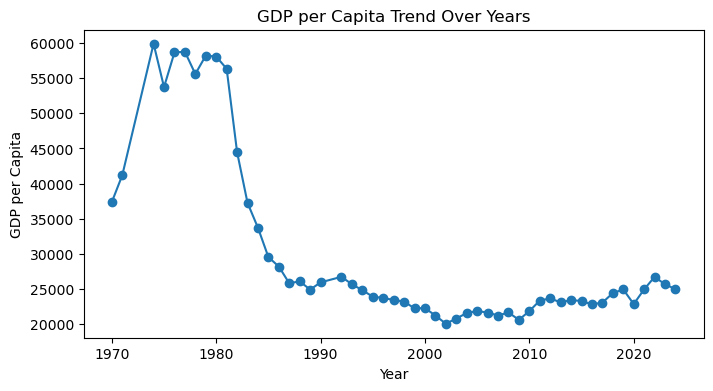

In [9]:
#This analysis helps address Business Question 1 regarding how GDP per capita in Saudi Arabia has changed over time
#and what long-term trends can be observed
    
    
year_cols = [col for col in df.columns if '[YR' in col] # years col

years = [int(col.split()[0]) for col in year_cols] # transforms years name into int

gdp_row = df[df['Series Name'] == 'GDP per capita (constant 2015 US$)']
values = gdp_row[year_cols].values.flatten().astype(float) # get the indicators values

plt.figure(figsize=(8,4))
plt.plot(years, values, marker='o')
plt.title('GDP per Capita Trend Over Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()





The line plot shows that GDP per capita in Saudi Arabia was relatively high in the 1970s, starting at around 36,000 USD, and increased further during the 1980s. This was followed by a gradual decline through the 1990s until around 2000. From 2000 to 2024, GDP per capita exhibits noticeable short-term fluctuations; however, the overall long-term trend is upward, with periods of growth outweighing periods of decline.

## EDA Summary

The exploratory data analysis revealed several structural characteristics and limitations of the dataset. The last five rows contain only missing values, indicating the need for data cleaning prior to analysis. Transforming the data is necessary to improve the interpretability and performance of the model. Therefore, further preprocessing is required. Specifically, rows with missing values should be removed using `dropna()`, and the dataset should be reshaped using a melt [1] and pivot [2] approach to convert it into a long format suitable for time-series analysis and predictive modeling.


## Data Cleaning 

In [10]:
#removing null rows
dfnon_null=df.dropna()
dfnon_null

,Country Name,Country Code,Series Name,Series Code,1970 [YR1970],1971 [YR1971],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Saudi Arabia,SAU,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.177778,4.475000,21.437008,34.576106,31.558661,11.399011,...,1.222693,2.053471,-0.834846,2.465943,-1.192986,3.372350,3.063290,2.474074,2.327085,1.687921
1,Saudi Arabia,SAU,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,50.801719,53.984552,62.936061,73.333739,59.729574,57.420628,...,31.440132,29.143090,32.362538,35.520983,32.159205,23.809812,29.155661,35.985010,30.242520,29.109212
2,Saudi Arabia,SAU,Consumer price index (2010 = 100),FP.CPI.TOTL,22.476564,23.482391,34.664481,46.650109,61.372259,68.368090,...,116.616377,119.011060,118.017502,120.927746,119.485094,123.514550,127.298158,130.447609,133.483236,135.736327
3,Saudi Arabia,SAU,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,37361.658590,41183.786354,59924.248495,53743.563187,58684.093109,58778.055609,...,23256.154955,22783.032854,23035.119998,24393.518831,24905.669743,22827.671936,24922.671695,26706.917926,25634.823755,24963.332214


In [11]:
# transform the data into long format using melt
df_long = dfnon_null.melt(
    id_vars=['Country Name', 'Series Name','Series Code', 'Country Code'],  # Columns that remain fixed (identifier columns)

    var_name='Year', # Year column                         
    value_name='Value'  # Name of the column that stores the actual values of each feature
                      
)
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int) # to just extract the year instead of [YR2015]



df_long

,Country Name,Series Name,Series Code,Country Code,Year,Value
0,Saudi Arabia,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,SAU,1970,0.177778
1,Saudi Arabia,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,SAU,1970,50.801719
2,Saudi Arabia,Consumer price index (2010 = 100),FP.CPI.TOTL,SAU,1970,22.476564
3,Saudi Arabia,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,SAU,1970,37361.658590
4,Saudi Arabia,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,SAU,1971,4.475000
...,...,...,...,...,...,...
203,Saudi Arabia,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,SAU,2023,25634.823755
204,Saudi Arabia,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,SAU,2024,1.687921
205,Saudi Arabia,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,SAU,2024,29.109212
206,Saudi Arabia,Consumer price index (2010 = 100),FP.CPI.TOTL,SAU,2024,135.736327


In [12]:
# putting each indicator in one column using pivot
df_model = df_long.pivot(
    index='Year',
    columns='Series Name',
    values='Value'
).reset_index()

df_model

Series Name,Year,Consumer price index (2010 = 100),Exports of goods and services (% of GDP),GDP per capita (constant 2015 US$),"Inflation, consumer prices (annual %)"
0,1970,22.476564,50.801719,37361.658590,0.177778
1,1971,23.482391,53.984552,41183.786354,4.475000
2,1974,34.664481,62.936061,59924.248495,21.437008
3,1975,46.650109,73.333739,53743.563187,34.576106
4,1976,61.372259,59.729574,58684.093109,31.558661
5,1977,68.368090,57.420628,58778.055609,11.399011
6,1978,67.285411,49.316710,55609.836045,-1.583602
7,1979,68.013148,54.856386,58225.422273,1.081567
8,1980,70.848798,63.455801,58094.292185,4.169267
9,1981,72.831843,62.818693,56355.615104,2.798982


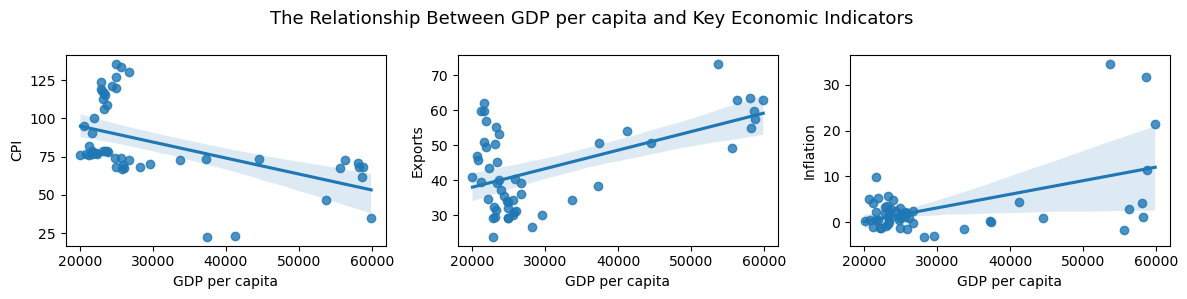

In [40]:
#This analysis helps address Business Question regarding the relationship between indicators and GDP per capita.



cols = [c for c in df_model.columns if c not in ['GDP per capita (constant 2015 US$)', 'Year']] # all col except year and gdp
col_names = ['CPI', 'Exports', 'Inflation'] # changing the names for clear visualisation

plt.figure(figsize=(12, 3))
plt.suptitle("The Relationship Between GDP per capita and Key Economic Indicators ", fontsize=13)
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)  # using subplot for better visualisation
    sns.regplot(x='GDP per capita (constant 2015 US$)', y=col, data=df_model)# Scatter plot with regression line showing relationship between X and Y
    plt.xlabel('GDP per capita')
    plt.ylabel(col_names[i-1])

plt.tight_layout()
plt.show()


 While the overall relationship appears roughly linear, the plots reveal clusters of points, indicating some variability and concentration in the data



## ML Model

Although the relationships are not perfectly linear, Linear Regression is used because GDP per capita is continuous, and this model provides a clear, interpretable baseline for understanding general trends.


In [42]:
# determine the dependent and independent var
y=df_model['GDP per capita (constant 2015 US$)']# the dependent variable as it represents the primary economic outcome of interest in this analysis.
X=df_model.drop(['GDP per capita (constant 2015 US$)'],axis=1)# the independent variables

In [43]:
#TTS
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
# call LinearRegression Model
LRmodel=LinearRegression()

In [45]:
#train the model
LRmodel.fit(X_train,y_train)

LinearRegression()

In [46]:
# make prediction in unseen data
GDPpre=LRmodel.predict(X_test)

## Model Evaluation

In [47]:
# sceince this is a regression model R2 and MSE will be used
r2_test = r2_score(y_test,GDPpre)
print("R2 Score Value:",r2_test)
#
mse=mean_squared_error(y_test,GDPpre)
print('MSE:', mse)
#
rmse=np.sqrt(mean_squared_error(y_test,GDPpre))
print('RMSE:', rmse)

R2 Score Value: 0.8618617925029344
MSE: 20822990.887770772
RMSE: 4563.221547083899



The model achieved an R² score of 0.86, indicating that approximately 86% of the variation in GDP per capita is explained by the selected economic indicators. This suggests that the model captures the overall trend reasonably well.The RMSE value of 4563 shows that, on average, the model’s predictions deviate from the actual GDP per capita values by about 4563 units. While this error indicates limited precision, it is acceptable for a baseline regression model applied to economic data. These metrics show that the model is suitable for understanding general patterns and relationships, but it is not intended for highly accurate long-term predictions.

## Scenario-Based Prediction

This analysis helps address Business **Question 3** regarding how hypothetical changes in inflation levels would affect GDP per capita in 2025 under a scenario-based prediction approach.

In [92]:
# Scenario: Changing Inflation Value 

inflation_val=[-1.081321, 3.887432, 4.087421,6.057321] # inflation values

# dataframe with fixed CPI,and Exports

scenario_df = pd.DataFrame({
    'Year': 2025,
    'Consumer price index (2010 = 100)': 136.736327 ,
    'Exports of goods and services (% of GDP)': 30.10 ,
    'Inflation, consumer prices (annual %)': inflation_val 
})

predicted_gdp = LRmodel.predict(scenario_df) # predict the senario


Gdp_results=pd.DataFrame({
    
    'Inflation':inflation_val,
    'GDP per capita for 2025 ':predicted_gdp
})
Gdp_results

,Inflation,GDP per capita for 2025
0,-1.081321,18041.123895
1,3.887432,19589.843184
2,4.087421,19652.178105
3,6.057321,20266.179672



In this scenario, all independent variables are held constant except inflation to isolate its effect on GDP per capita. As shown in the table, the predicted GDP per capita changes proportionally with inflation, reflecting the linear nature of the regression model. As inflation increases from -1.08% to 6.05%, GDP per capita rises accordingly. However, the relatively modest increase suggests that inflation plays a secondary role compared to other macroeconomic indicators such as CPI and exports.




## Assumptions and Limitations

This analysis applies linear regression to examine historical relationships between GDP per capita and  macroeconomic indicators, including inflation, CPI, and exports. The model assumes linear relationships among variables and focuses on interpretability rather than precise long-term forecasting.

However, the model has limitations. It does not account for non-linear dynamics, structural economic shifts, or external shocks such as financial crises or policy changes. In addition, the scenario-based predictions are illustrative, as they assume other variables remain constant while inflation changes.



## Refrences


[1]https://databank.worldbank.org/source/world-development-indicators/preview/on#


[2]https://pandas.pydata.org/docs/reference/api/pandas.melt.html


[3]https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html